<a href="https://colab.research.google.com/github/CalHdzg/Reto-Prediccion-de-candidatos-elegibles-para-promocion-laboral/blob/main/Carlos_Alejandro_Hern%C3%A1ndez_G%C3%B3mez_Reto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

1. Genera una libreta en Google Colab para el reto, cuya estructura esté basada en los análisis solicitados. Descarga el archivo: EmployeePromotion.csv y guarda, en un dataframe (info), todos sus registros.

In [ ]:
info = pd.read_csv("/content/drive/MyDrive/The Learning Gate/AutoML - Reto/EmployeePromotion.csv")
info

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,45,0


2. Realiza un análisis exploratorio de datos con la plataforma de AutoEDA YData Profiling. En la sección de Overview incluye una pestaña Dataset con la descripción del conjunto de datos y tu nombre como autor. En una pestaña Variables coloca el significado de las columnas.

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip #Tuve que agregar esta línea para que pandas_profiling se instalara bien
!pip install pandas_profiling --upgrade

In [ ]:
from pandas_profiling import ProfileReport

pandasp_report = ProfileReport(info, dataset={
                                          'description': 'Reporte de EmployeePromotion.cvs', #Una información sin importancia, pero para que aparezca ahí y se vea coqueto
                                          'author': 'Carlos Alejandro Hernández Gómez'},
                                    variables={
                                          'descriptions': { #Descripciones de las variables
                                              'employee_id': 'ID único para el empleado',
                                              'department': 'Departamento del empleado',
                                              'region': 'Región de empleo',
                                              'education': 'Nivel educativo',
                                              'gender': 'Género del empleado',
                                              'recruitment_channel': 'Canal de reclutamiento',
                                              'no_of_trainings': 'Número de capacitaciones completadas el año anterior',
                                              'age': 'Edad',
                                              'previous_year_rating': 'Calificación del empleado en el año previo',
                                              'length_of_service': 'Años de servicio',
                                              'awards_won?': '¿Ganó algún premio el años previo?',
                                              'avg_training_score': 'Promedio de las evaluaciones de formación actuales',
                                              'is_promoted': '¿Recomendado para promoción?'}},
                                    interactions={'targets': ['is_promoted']}) #Para que sólo muestre diagramas de nuestra variable objetivo contra las demás.
pandasp_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Del reporte obtenido que "age" tiene un alta correlación lineal con "length_of_service" y "avg_traning_score" tiene un alta correlación lineal con "department".
"awards_won?" e "is_promoted" tienen un alto imbalance y "education" y "previous_year_rating" tienen una cantidad grande de valores faltantes y la variable "employee_id" es de valores únicos.

3. Con la plataforma SweetViz divide el conjunto utilizando la variable gender como booleana para comparar las características de los subconjuntos resultantes.

In [ ]:
!pip install sweetviz
import sweetviz as sv

                                             |          | [  0%]   00:00 -> (? left)


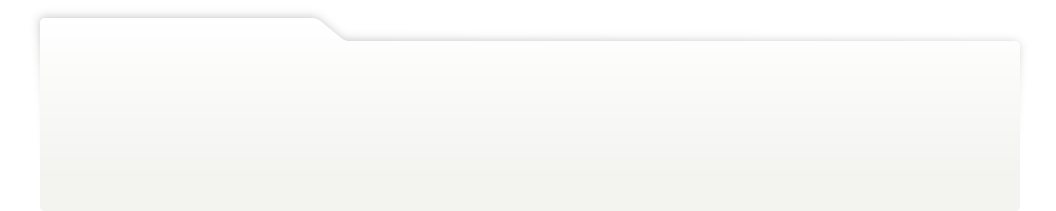
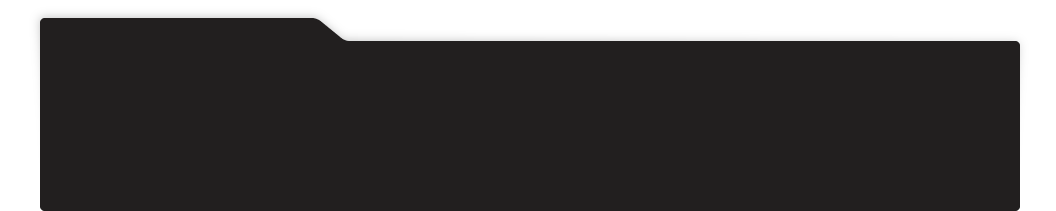
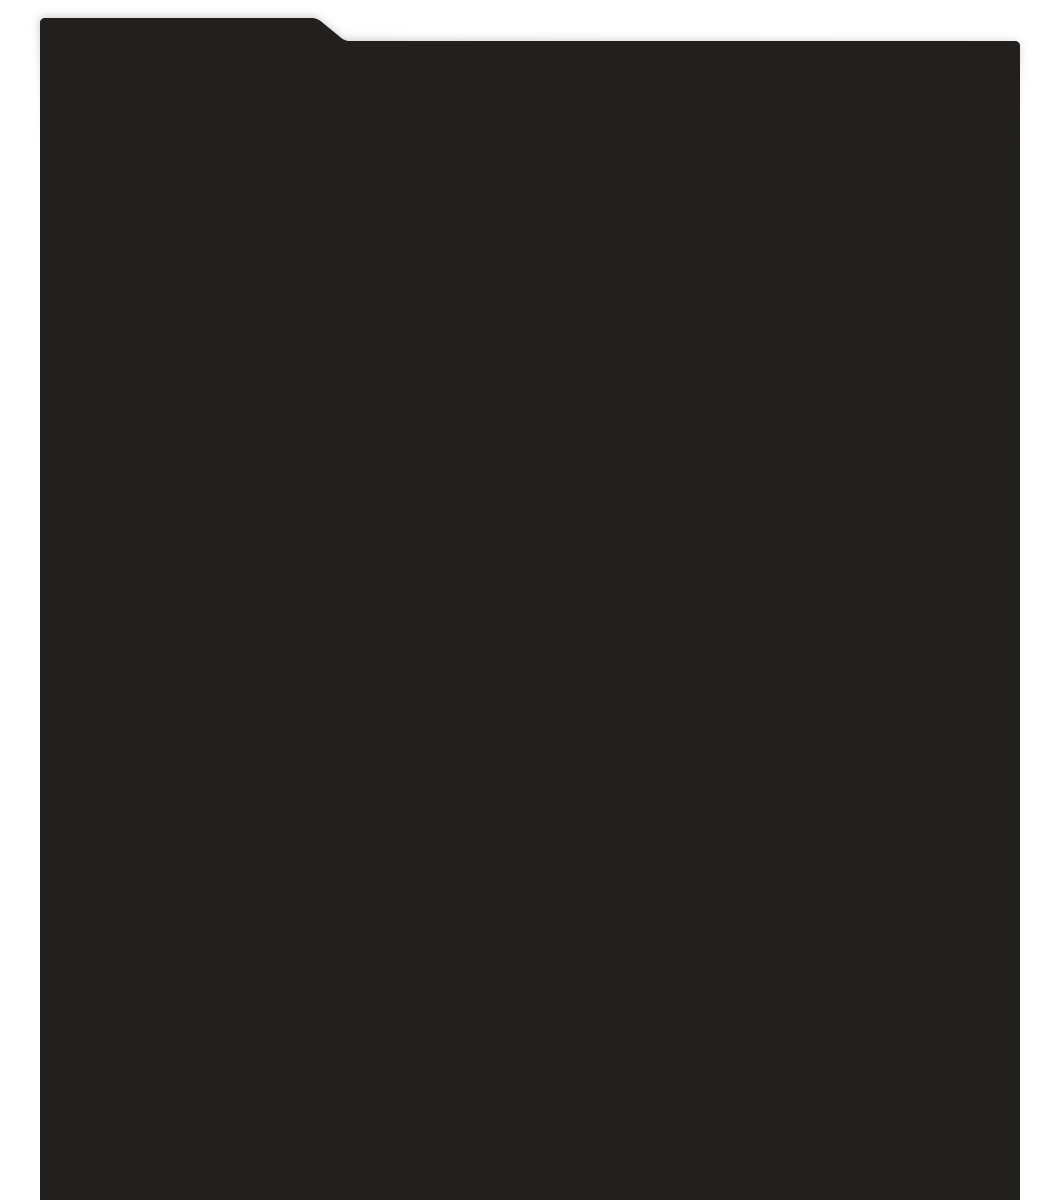
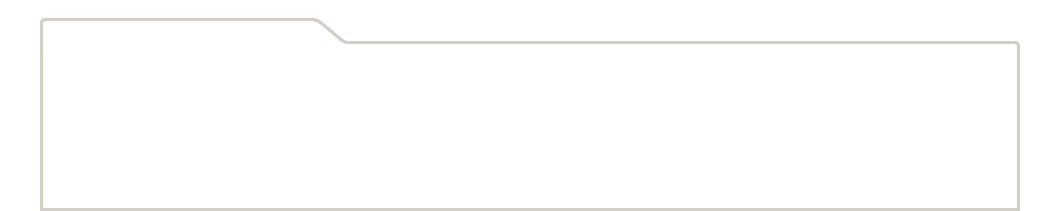
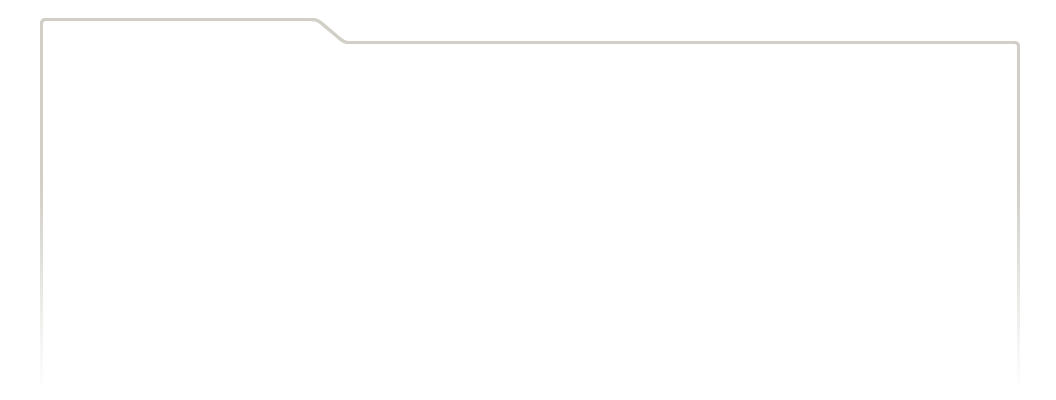
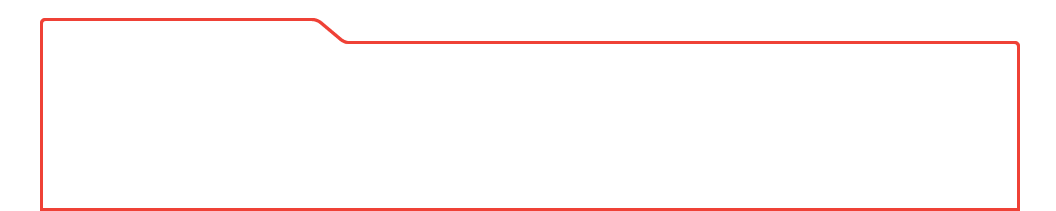
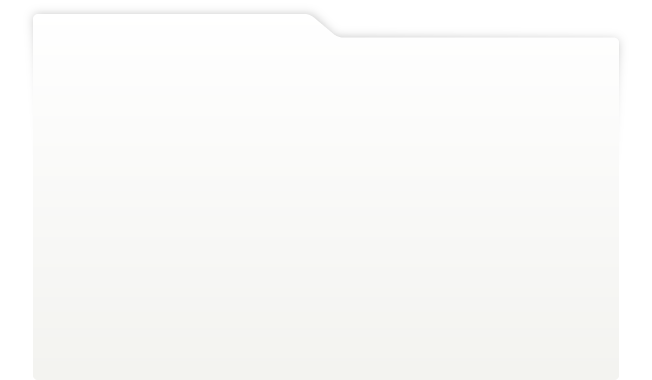
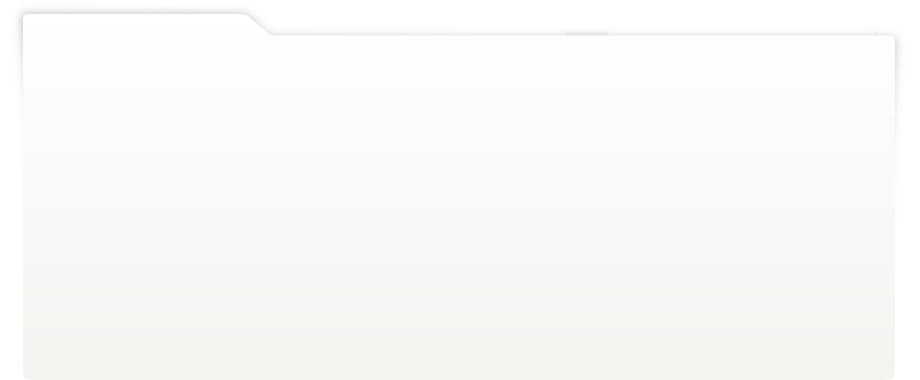
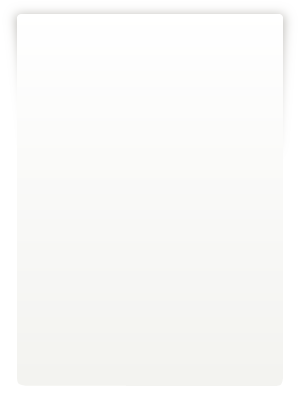
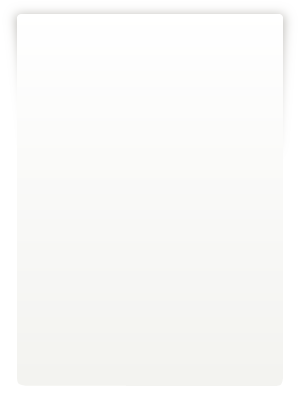
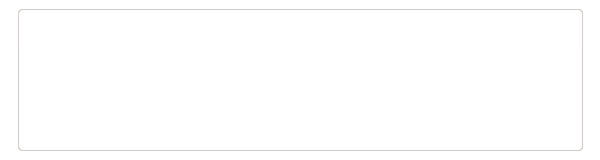
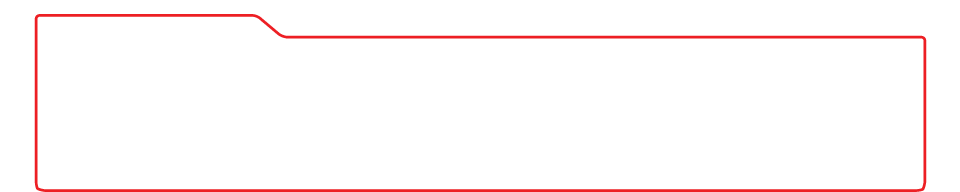
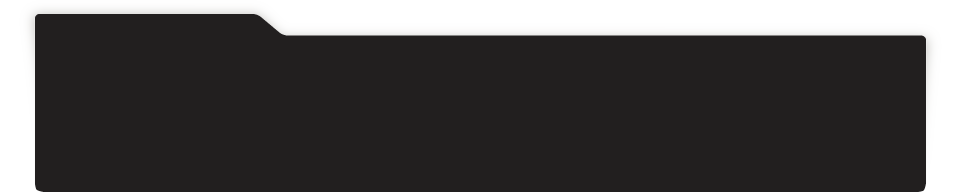
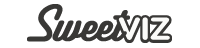
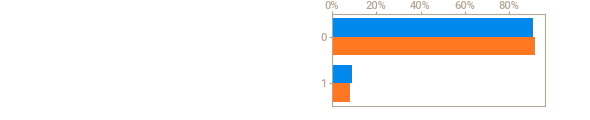
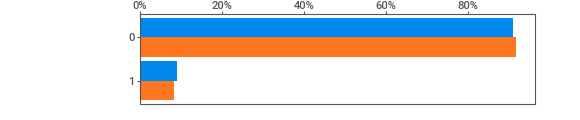
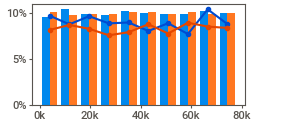
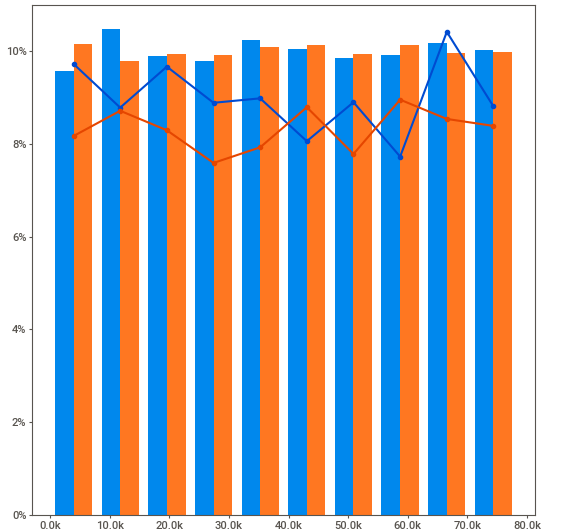
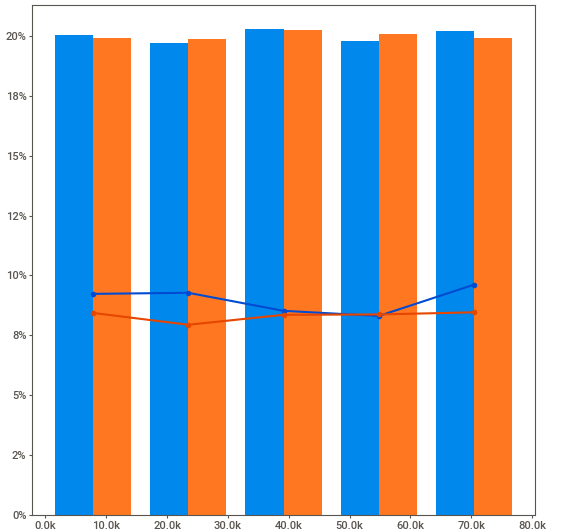
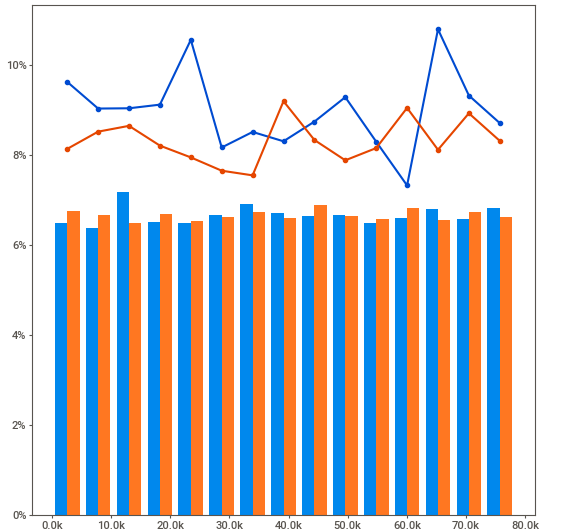
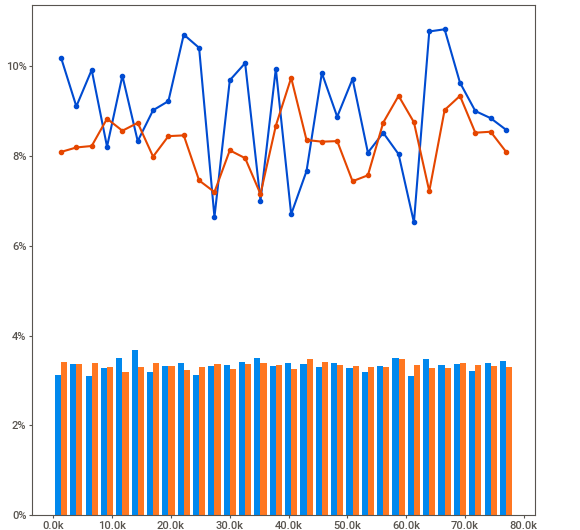
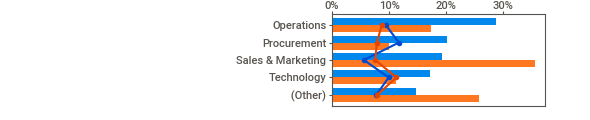
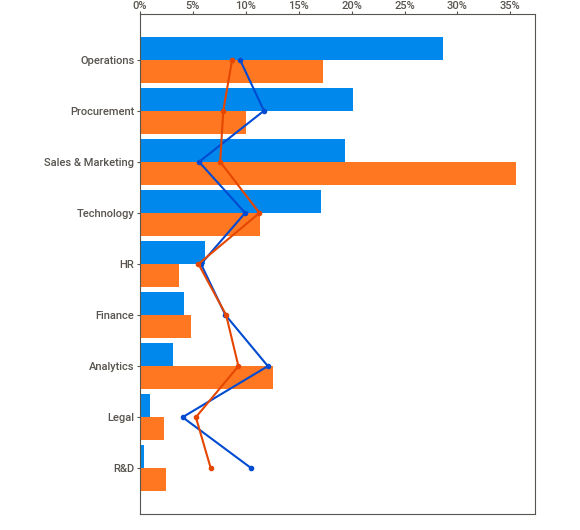
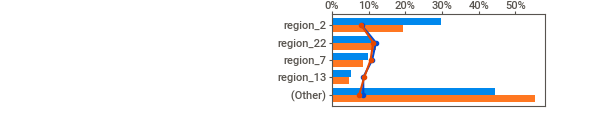
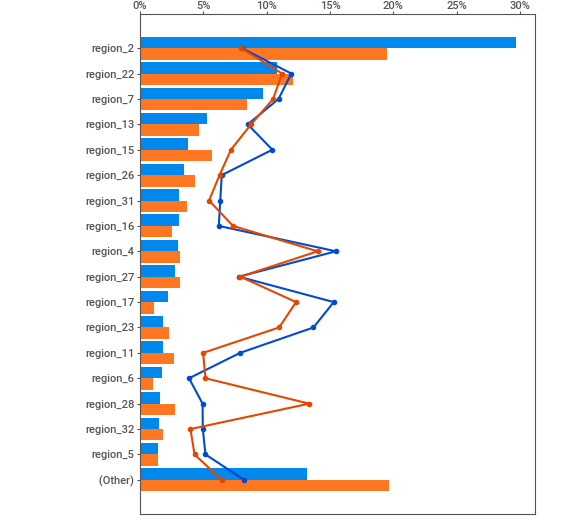
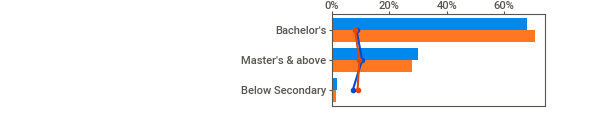
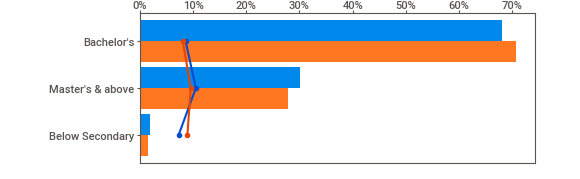
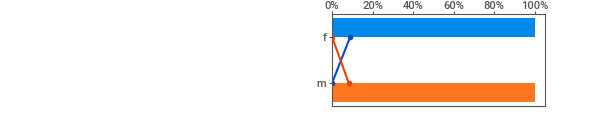
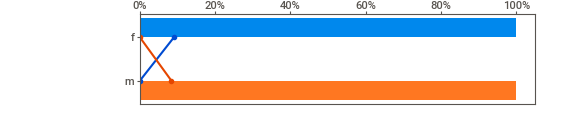
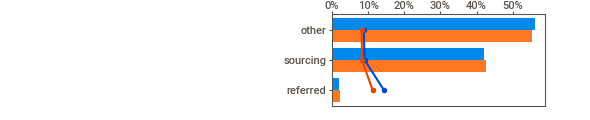
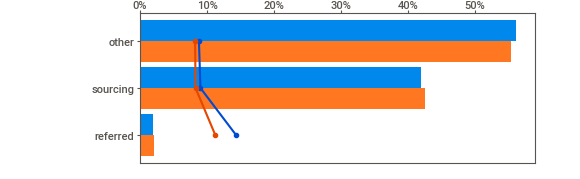
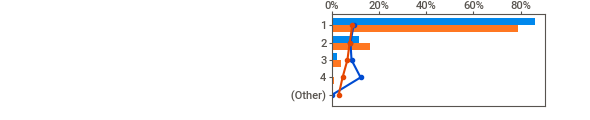
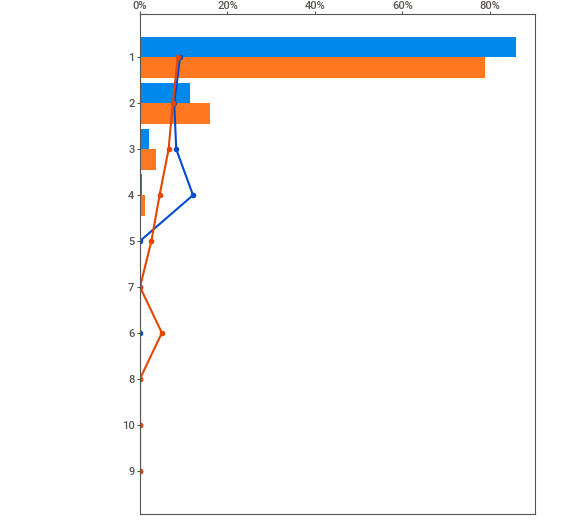
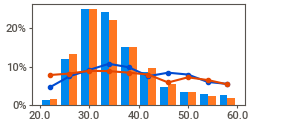
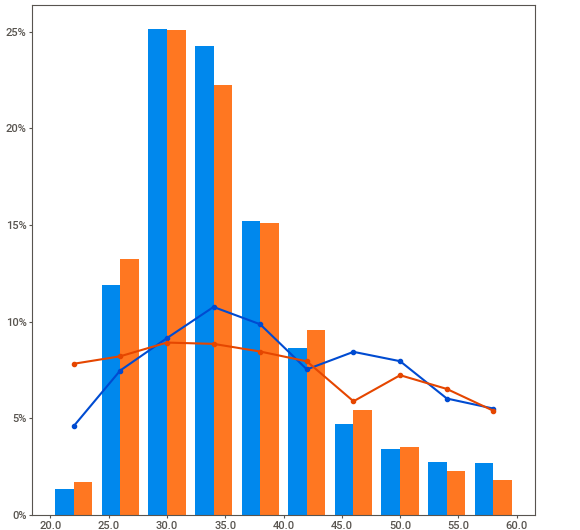
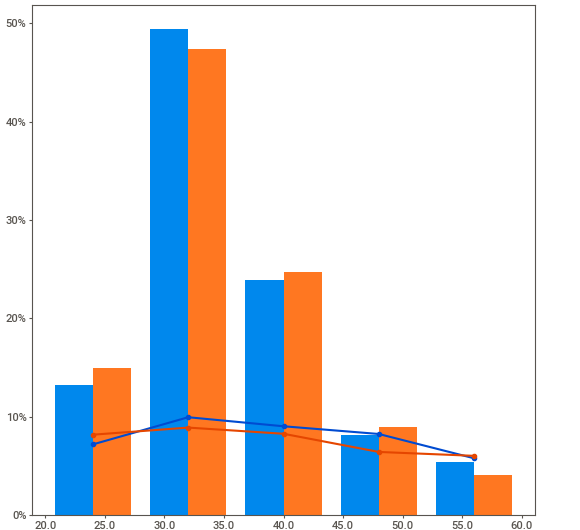
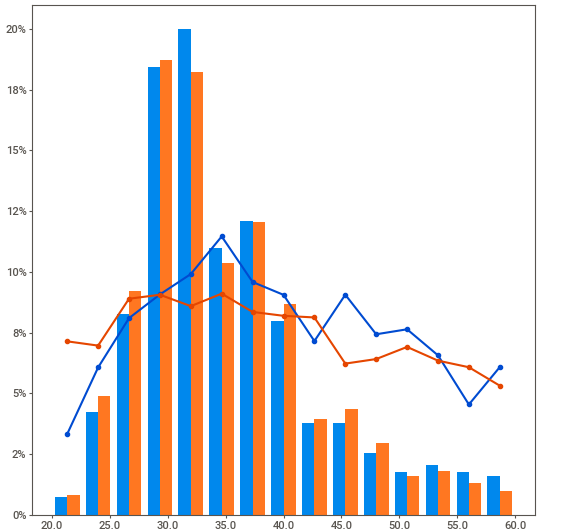
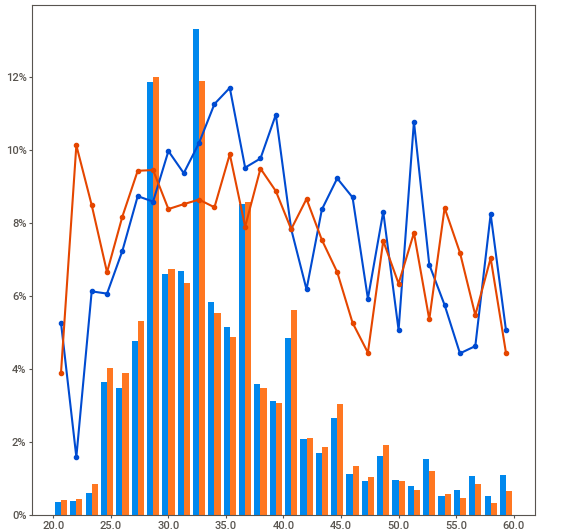
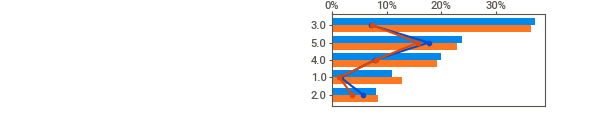
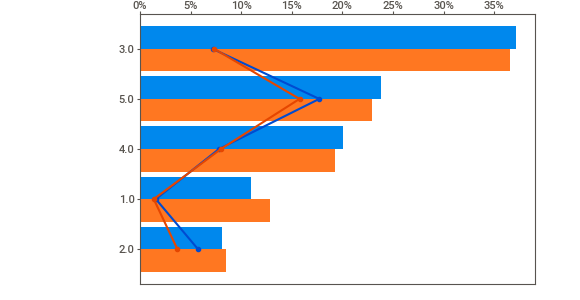
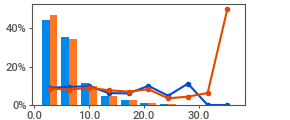
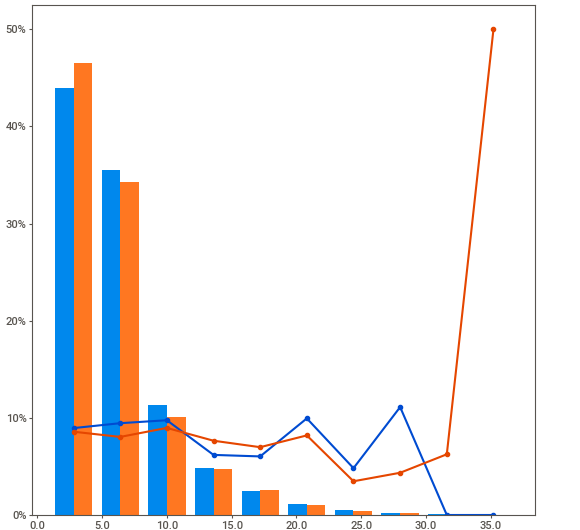
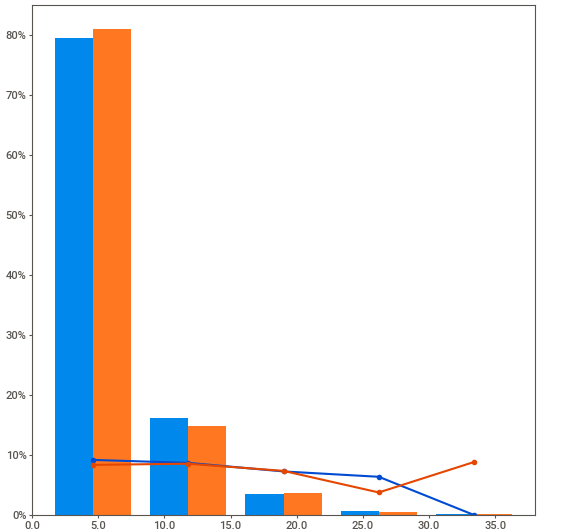
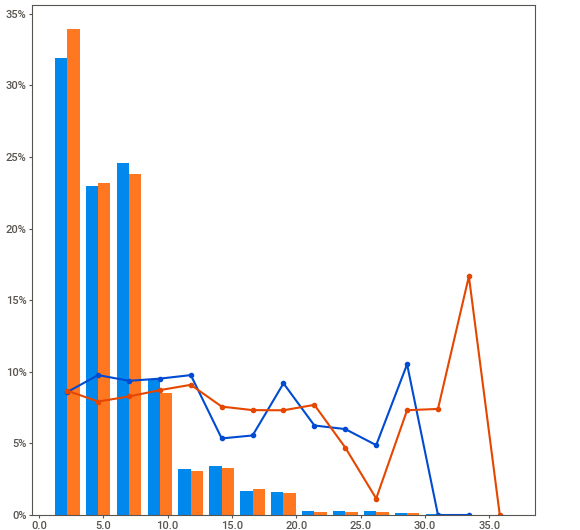
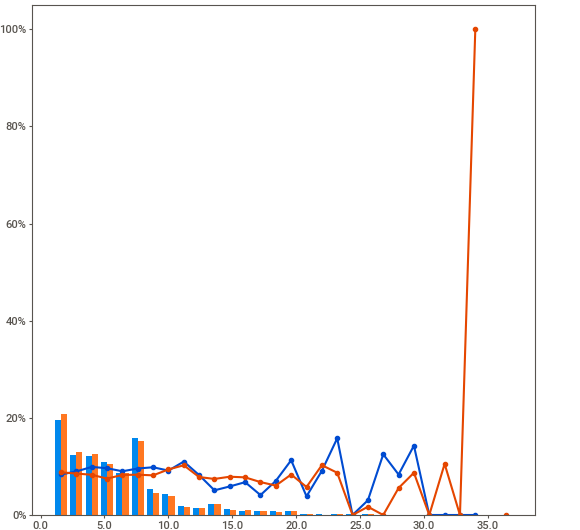
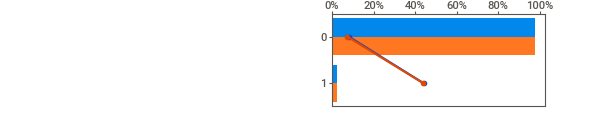
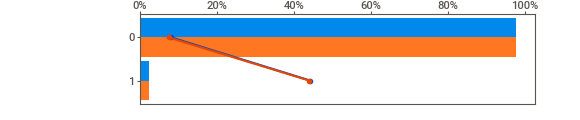
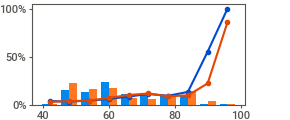
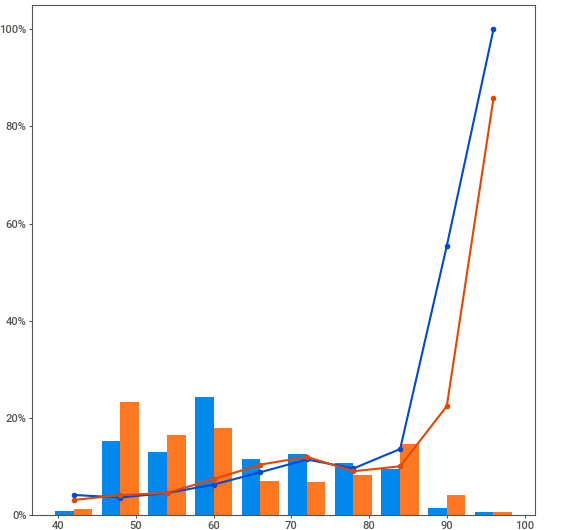
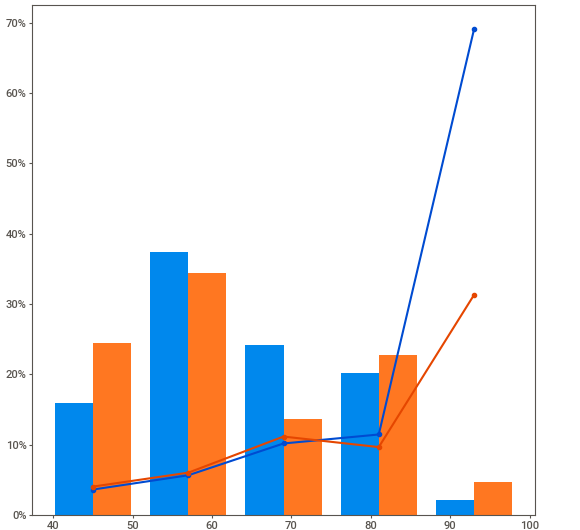
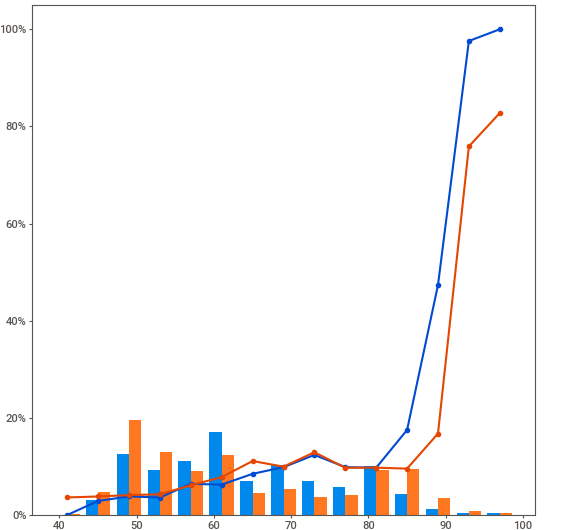
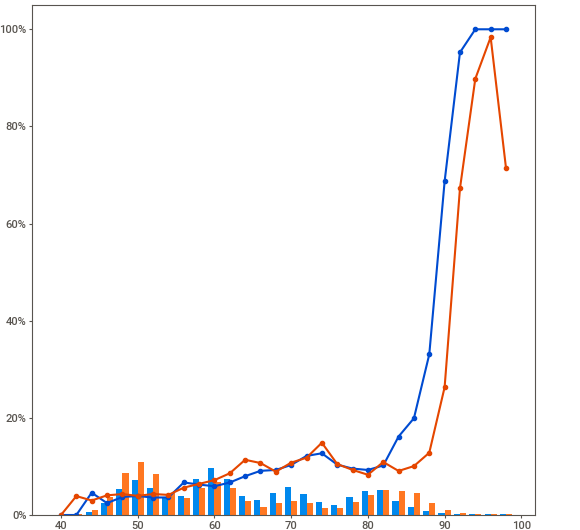
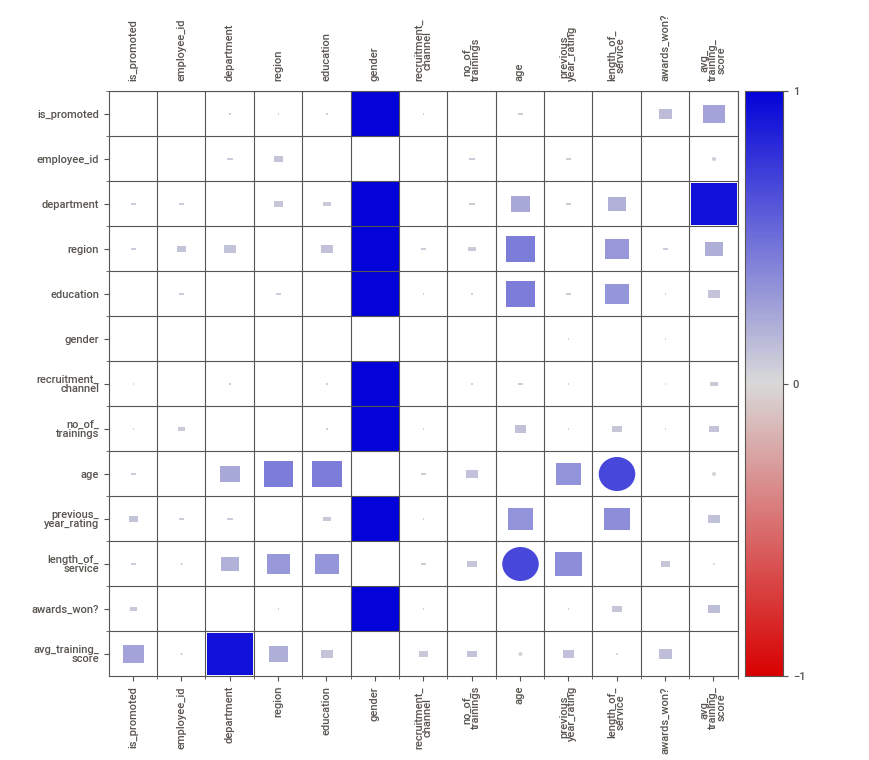
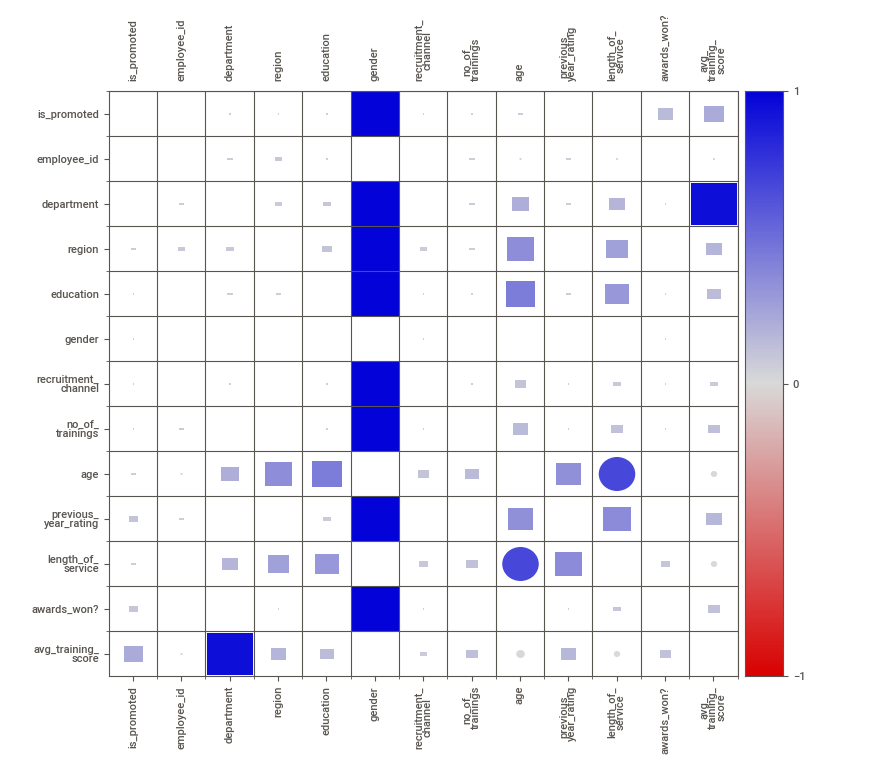

In [ ]:
sweetv_compare_intra = sv.compare_intra(info, target_feat='is_promoted', #Establece a la variable objetivo
                                        condition_series=info['gender']=='f', names=['Mujer','Hombre']) #Separa a la base de datos en dos para su comparación
sweetv_compare_intra.show_notebook()

Hay un desbalance en las cantidades de hombres y mujeres, pues más del doble de las personas son hombres. No obstante, proporcionalmente, hay porcentajes muy similares de hombres y mujeres que son promovidas. El 8.988% de las mujeres fueron promovidas y el 8.315% de los hombres fueron promovidos.
En general las gráficas de las distintas variables tienen distribuciones muy similares entre hombres y mujeres, excepto por la de "departamento", en donde parece haber más mujeres que hombres en "Operations" y "Procurement" y muchos más hombres que mujeres en las áreas de "Sales & Marketing" y "Analytics".
Finalmente, viendo a las matrices de correlación lado a lado, no parece haber mucha diferencia entre ser hombre y mujer para las correlaciones en general.



4. Elimina los registros con información faltante (NaN) y la columna employee_id por no tener aportación en la predicción.

In [ ]:
info.dropna(axis=0, inplace=True) #Elimina a las filas con valores nulos
info.drop(axis=1, columns=['employee_id'], inplace=True) #Elimina a la columna especificada

In [ ]:
info

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...
54802,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.0,2,0,49,0
54803,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0


# Obtención de un modelo de ML con TPOT:

In [ ]:
!pip install tpot
from tpot import TPOTClassifier

5. Codifica las variables categóricas de info con LabelEncoder.

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = info.select_dtypes(include='object').columns.to_list() #Hacemos una lista de las variables categóricas
info = info.apply(lambda x: LabelEncoder().fit_transform(x) if (x.name in categorical_cols) else x) #Realizamos la codificación de las variables categóricas (necesaria para el ML que haremos)

6. Divide la matriz en conjuntos de entrenamiento y prueba (80:20), utilizando el parámetro random_state=1 para garantizar reproducibilidad.

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(info, train_size=0.80, random_state=1)

7. Observa la distribución de la variable objetivo is_promoted. En caso de que las clases estén desbalanceadas, ejecuta over_sampling con el método SMOTE().

In [ ]:
info['is_promoted'].value_counts() #Contamos los valores y en efecto se ve un desbalance (que ya se notaba desde el análisis exploratorio)

0    44428
1     4232
Name: is_promoted, dtype: int64

In [ ]:
y = 'is_promoted' #Esto es para poder separar a la variable objetivo de las demás luego al hacer el entrenamiento
X = list(info.columns)
X.remove(y)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1) #"random_state=1" para preservar la replicabilidad
train[X], train[y] = smote.fit_resample(train[X],train[y]) #Así esa variable queda balanceada, este método necesita a las variables previamente separadas en X,y.

8. Ejecuta el autoaprendizaje utilizando la métrica "accuracy".

In [ ]:
tpot = TPOTClassifier(max_time_mins = 1, random_state=1, scoring='accuracy') #Se perzonalizan los ajustes pertinentes
tpot.fit(train[X], train[y]) #Se realiza el entrenamiento
tpot.score(test[X], test[y]) #Se califica al resultado basado en su desempeño en la base test

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8795725441841348

# Obtención de un modelo de machine learning con PyCaret:

In [ ]:
!pip install scikit-learn
!pip install imbalanced-learn
!pip install pycaret
!pip install jinja2
!pip install pyyaml
!pip install MarkupSafe
!pip install pyyaml

In [38]:
import pycaret
import markupsafe
import jinja2
from pycaret.classification import *

9. Divide la matriz en conjuntos de entrenamiento y prueba (80:20), utilizando el parámetro random_state=1 para garantizar reproducibilidad.

In [39]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(info, train_size=0.80, random_state=1)

10. Ejecuta el autoaprendizaje con parámetros equivalentes a los que usaste en TPOT y optimiza el mejor modelo con la métrica accuracy.

In [40]:
pyc = setup(data=train, target='is_promoted', test_data=test, fix_imbalance=True, session_id=1)

,Description,Value
0,Session id,1
1,Target,is_promoted
2,Target type,Binary
3,Original data shape,"(48660, 12)"
4,Transformed data shape,"(80836, 12)"
5,Transformed train set shape,"(71104, 12)"
6,Transformed test set shape,"(9732, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [41]:
leader = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9403,0.8085,0.3513,0.8993,0.5051,0.4797,0.5406,0.9580
lightgbm,Light Gradient Boosting Machine,0.9392,0.8141,0.3261,0.9232,0.4818,0.4573,0.5283,5.5500
rf,Random Forest Classifier,0.9259,0.7621,0.2530,0.7036,0.3717,0.3415,0.3929,9.5550
et,Extra Trees Classifier,0.9246,0.7627,0.2935,0.6447,0.4029,0.3686,0.4016,6.4020
gbc,Gradient Boosting Classifier,0.9177,0.7707,0.2308,0.5649,0.3274,0.2916,0.3253,10.6750
dummy,Dummy Classifier,0.9133,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1410
ada,Ada Boost Classifier,0.9000,0.7324,0.2160,0.3774,0.2718,0.2225,0.2339,2.8900
dt,Decision Tree Classifier,0.8728,0.6387,0.3552,0.3020,0.3262,0.2565,0.2576,0.5420
nb,Naive Bayes,0.8165,0.7110,0.4366,0.2197,0.2922,0.1999,0.2155,0.1540
qda,Quadratic Discriminant Analysis,0.8058,0.7107,0.4411,0.2080,0.2825,0.1867,0.2045,0.1710


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [42]:
leader = create_model(leader)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9427,0.8197,0.3561,0.9524,0.5184,0.4945,0.5631
1,0.9401,0.8181,0.3591,0.8768,0.5095,0.4835,0.5387
2,0.9327,0.7756,0.3107,0.7836,0.4449,0.4161,0.4672
3,0.9417,0.8295,0.3639,0.9111,0.5201,0.4951,0.5548
4,0.9419,0.8180,0.3728,0.9000,0.5272,0.5019,0.5578
5,0.9396,0.8014,0.3462,0.8931,0.4989,0.4734,0.5344
6,0.9422,0.8062,0.3609,0.9313,0.5203,0.4958,0.5597
7,0.9394,0.8006,0.3432,0.8923,0.4957,0.4702,0.5317
8,0.9414,0.8128,0.3591,0.9098,0.5149,0.4899,0.5506


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [43]:
tuned_leader = tune_model(leader, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9355,0.8145,0.3442,0.7945,0.4803,0.4516,0.4970
1,0.9350,0.8189,0.3591,0.7658,0.4889,0.4590,0.4968
2,0.9273,0.7767,0.3166,0.6730,0.4306,0.3971,0.4296
3,0.9355,0.8153,0.3639,0.7736,0.4950,0.4653,0.5033
4,0.9342,0.8039,0.3580,0.7562,0.4859,0.4556,0.4922
5,0.9314,0.7938,0.3432,0.7205,0.4649,0.4332,0.4674
6,0.9358,0.7957,0.3639,0.7785,0.4960,0.4665,0.5052
7,0.9322,0.8011,0.3462,0.7312,0.4699,0.4386,0.4738
8,0.9371,0.8146,0.3709,0.7911,0.5051,0.4761,0.5153


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


11. Utiliza evaluate_model() para mostrar la interfaz de usuario con detalles del modelo optimizado.

In [44]:
evaluate_model(tuned_leader)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

12. Verifica las métricas con el conjunto de prueba.

In [45]:
predict_model(tuned_leader);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9408,0.8131,0.3668,0.9023,0.5216,0.4960,0.5537
